# AIML Classification Assignment 3
## Student Id: 2021AIML064

**Decision Tree Assignment**

The given dataset is from Dream Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full.
 
Dataset: loan_data.csv 
Here are what the columns represent:
 
1.	credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2.	purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3.	int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4.	installment: The monthly installments owed by the borrower if the loan is funded.
5.	log.annual.inc: The natural log of the self-reported annual income of the borrower.
6.	dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7.	fico: The FICO credit score of the borrower.
8.	days.with.cr.line: The number of days the borrower has had a credit line.
9.	revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10.	revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11.	inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12.	delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13.	pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
14.	not.fully.paid: whether or not the borrower paid back their loan in full
  
QUESTIONS: 

Q-1: Load the dataset and print the metadata in the notebook. 1M

 Q-2: Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid. 1M 
 
Q-3: Print a heatmap to check NULL values. 1M

Q-4: Perform startified splitting of train and test data. 1M 

Q-5: Build a classifier model using Decision Tree algorithm and plot the  same. 2M 

Q-6: Print confusion matrix and classification report before and after pruning the Decision tree. Write down your observations on the effects of pruning. - (1+1)M      

Q-7: Find out the stratified cross validation accuracy 1M.


# Decision Tree classifier

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns # for Data visualization
import matplotlib.pyplot as plt # for Data visualization
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import missingno as msno
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### 1. Load the dataset and print the metadata in the notebook

In [2]:
# Read data from csv file
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
print("Row and column counts in loan_data.csv: ",df.shape)

Row and column counts in loan_data.csv:  (9578, 14)


In [4]:
# check the datatypes of columns
df.dtypes 

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
# Get statistics around the dataset
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### 2. Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid

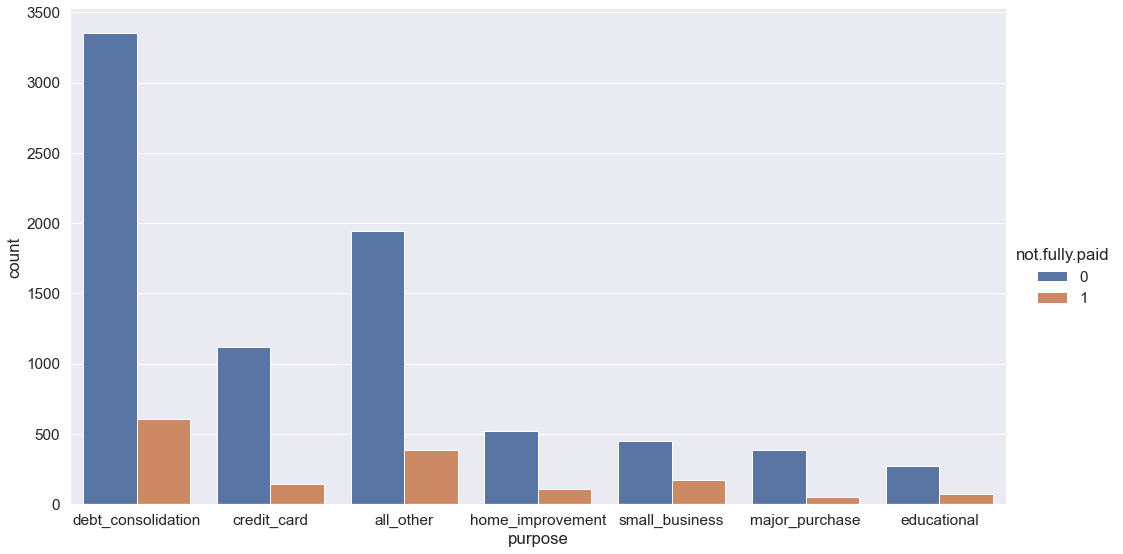

In [7]:
sns.set(style="darkgrid", font_scale=1.4)
sns.catplot(x="purpose", hue="not.fully.paid",
                data=df, kind="count",
                height=8, aspect=1.8);


## Conclusions from countplot
#### 1. Debt Consolidation is the major reason for taking a loan
#### 2. Default or not (paid or not) has a mostly similar ratio across loan purposes
#### 3. Education is the least represented reason for taking a loan in this population
#### 4. Dataset is imbalanced with respect to the 2 classes -'not fully paid' and 'paid'


### 3. Print a heatmap to check NULL values.

<AxesSubplot:>

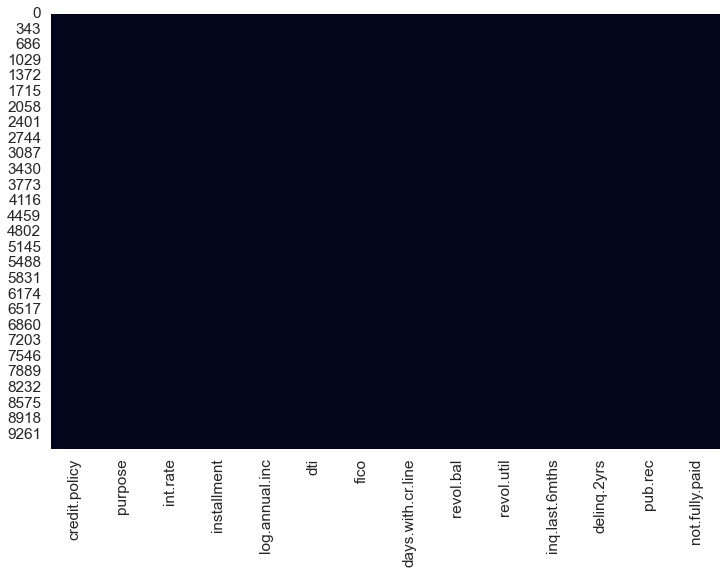

In [8]:
# heatmap to find the null values
plt.figure(figsize = (12,8)) 
sns.heatmap(df.isnull(), cbar=False)


<AxesSubplot:>

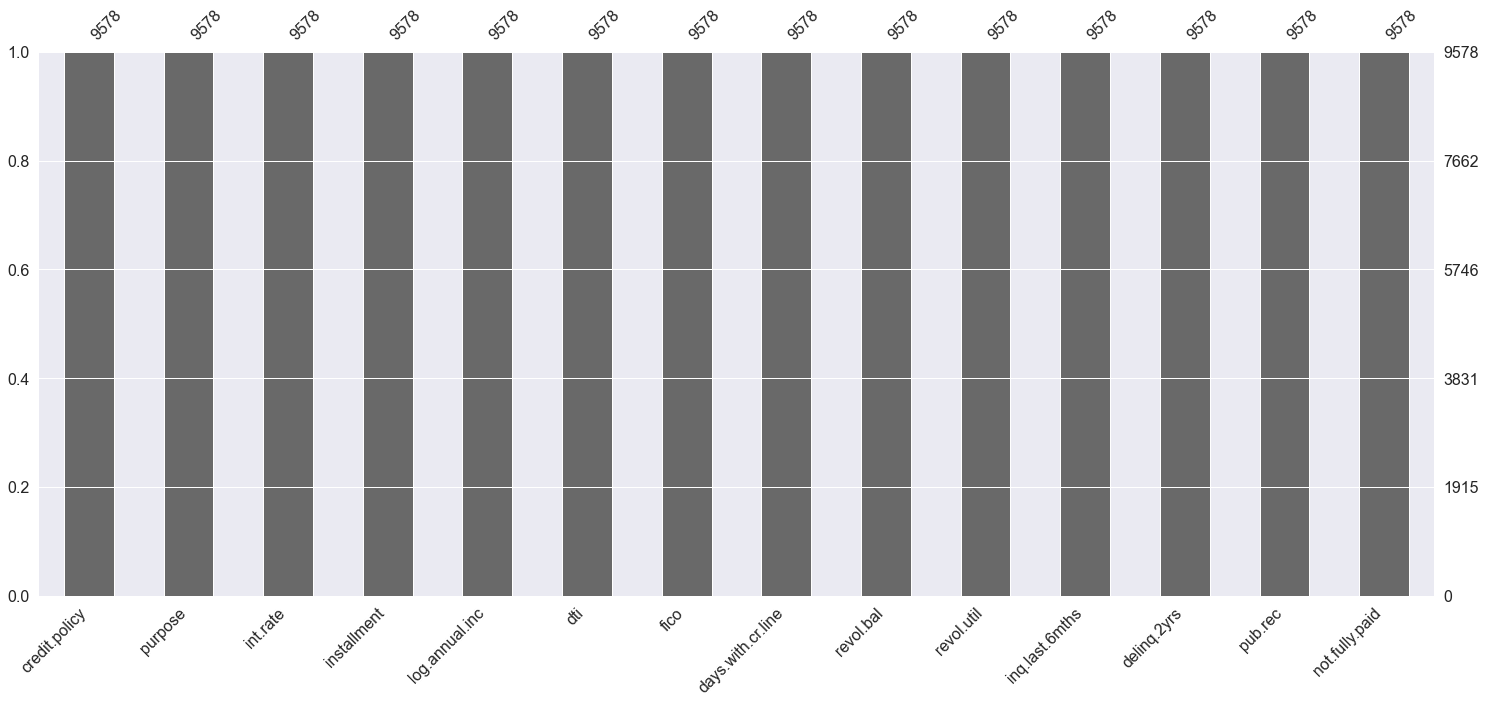

In [9]:
msno.bar(df)

**No missing or null values across the variables**

In [10]:
# Find and drop duplicates
df_duplicates = df[df.duplicated(keep = False)]
print ('Duplicate records: ', df_duplicates)
#df.drop_duplicates( keep="first", inplace=True)

Duplicate records:  Empty DataFrame
Columns: [credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid]
Index: []


**No duplicate records**

<AxesSubplot:>

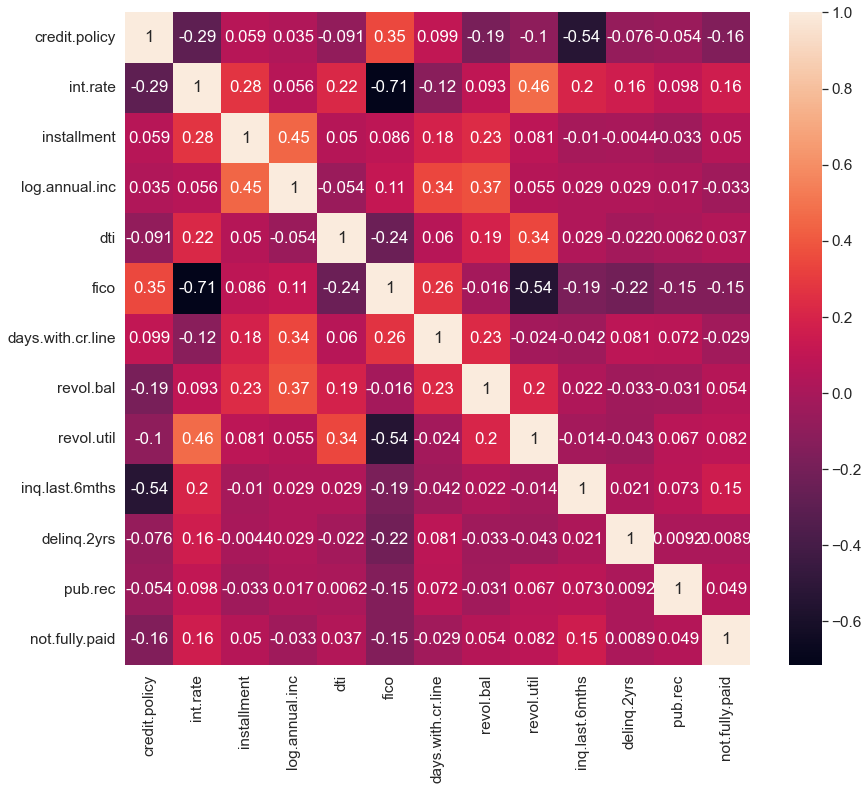

In [11]:
# heatmap to find correlation across the independent variables
plt.figure(figsize = (14,12)) 
sns.heatmap(df.corr(), annot = True)

**No strong correlation across the independent variable are observed
Also correlation is not the most suitable metric since correlation works only to check for linear relationship between conti variables  
No conclusions can be drawn regarding the suitablity of predicting indep variable from this heat map since indep variable is binary in our case - fully paid not not**

0    8045
1    1533
Name: not.fully.paid, dtype: int64


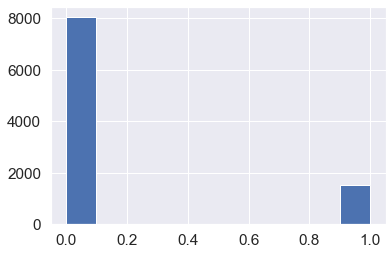

In [12]:
# Check class balance
print(df['not.fully.paid'].value_counts())
plt.hist(df['not.fully.paid'])
plt.show()


#### Class is roughly 85/15 split and imbalanced. This indicates a need to be stratified when sampling/splitting

In [13]:
# we have a categoricl variable in dataset which need to be converted into binary by creating dummy variable
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [14]:
# Get the data ready for modelling. Drop the categorical variable after binarizing
df = pd.concat([df, pd.get_dummies(df.purpose)], axis=1)
df = df.drop('purpose', axis=1)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  all_other           9578 non-null   uint8  
 14  credit_card         9578 non-null   uint8  
 15  debt_consolidation  9578 non-null   uint8  
 16  educat

# 4. Perform startified splitting of train and test data

**a. Split features and labels and standardize the features**

In [16]:
# split into X and y
X = df.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']

# instantiate bianay encoder
#encoder = TargetEncoder(cols = ['purpose'])
#df['purpose'] = encoder.fit_transform(df['purpose'], df['not.fully.paid'])
# fit and transform
#X = encoder.fit_transform(X, y)
#X

**b. Split train and test data**

In [17]:
# Perform stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

# 5. Build a classifier model using Decision Tree algorithm and plot the  same

## We will prepare Intial model with full tree with identifying best paramters for model and build tree

In [18]:
## importing libraries 
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc

In [19]:
# Prepare parameters for modelling
# Stratified Sampling and Splitting
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=100)

# CrossValidation and GridSearch
param_grid = {'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_depth':[x for x in range(1,20)]}
best_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv).fit(X,y)
print("Best Score : {:.3f}\nBest Params: {}".format(best_model.best_score_, best_model.best_params_))

Best Score : 0.840
Best Params: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}


## This accuracy clearly is not the indicator of performance as the classes are very imbalanced (84/16)
## Therefore use a model with class weights

In [20]:
#further refine best parameters from above result
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
print('Class Weights:', compute_class_weight(class_weight='balanced', classes=y.unique().tolist(), y=y))
param_grid={'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_depth':[1,2,3], 'class_weight':['balanced']}
best_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv).fit(X,y)
print("Best Score   : {:.3f}\nBest Params  : {}".format(best_model.best_score_, best_model.best_params_))

Class Weights: [0.59527657 3.12393999]
Best Score   : 0.759
Best Params  : {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}


## We idenfiied best parameters with balanced class weight  for model and now lets build Initial model with full tree without pruninght nodes.

In [21]:
# Create a Decision Tree Classifier with balanced class weight
decision_tree = DecisionTreeClassifier(class_weight='balanced')
decision_tree.fit(X_train, y_train)

#Predict Output 
y_pred= decision_tree.predict(X_test)
print (y_pred)

[0 1 0 ... 0 0 0]


In [22]:
print("Training Accuracy  : {:.3f}".format(decision_tree.score(X_train, y_train)))
print("Testing Accuracy   : {:.3f}".format(decision_tree.score(X_test, y_test)))
print('Prediction Accuracy:', round(accuracy_score(y_test, y_pred), 3))

Training Accuracy  : 1.000
Testing Accuracy   : 0.730
Prediction Accuracy: 0.73


In [23]:
depth=decision_tree.get_depth()
print("depth of full tree:",depth)

depth of full tree: 27


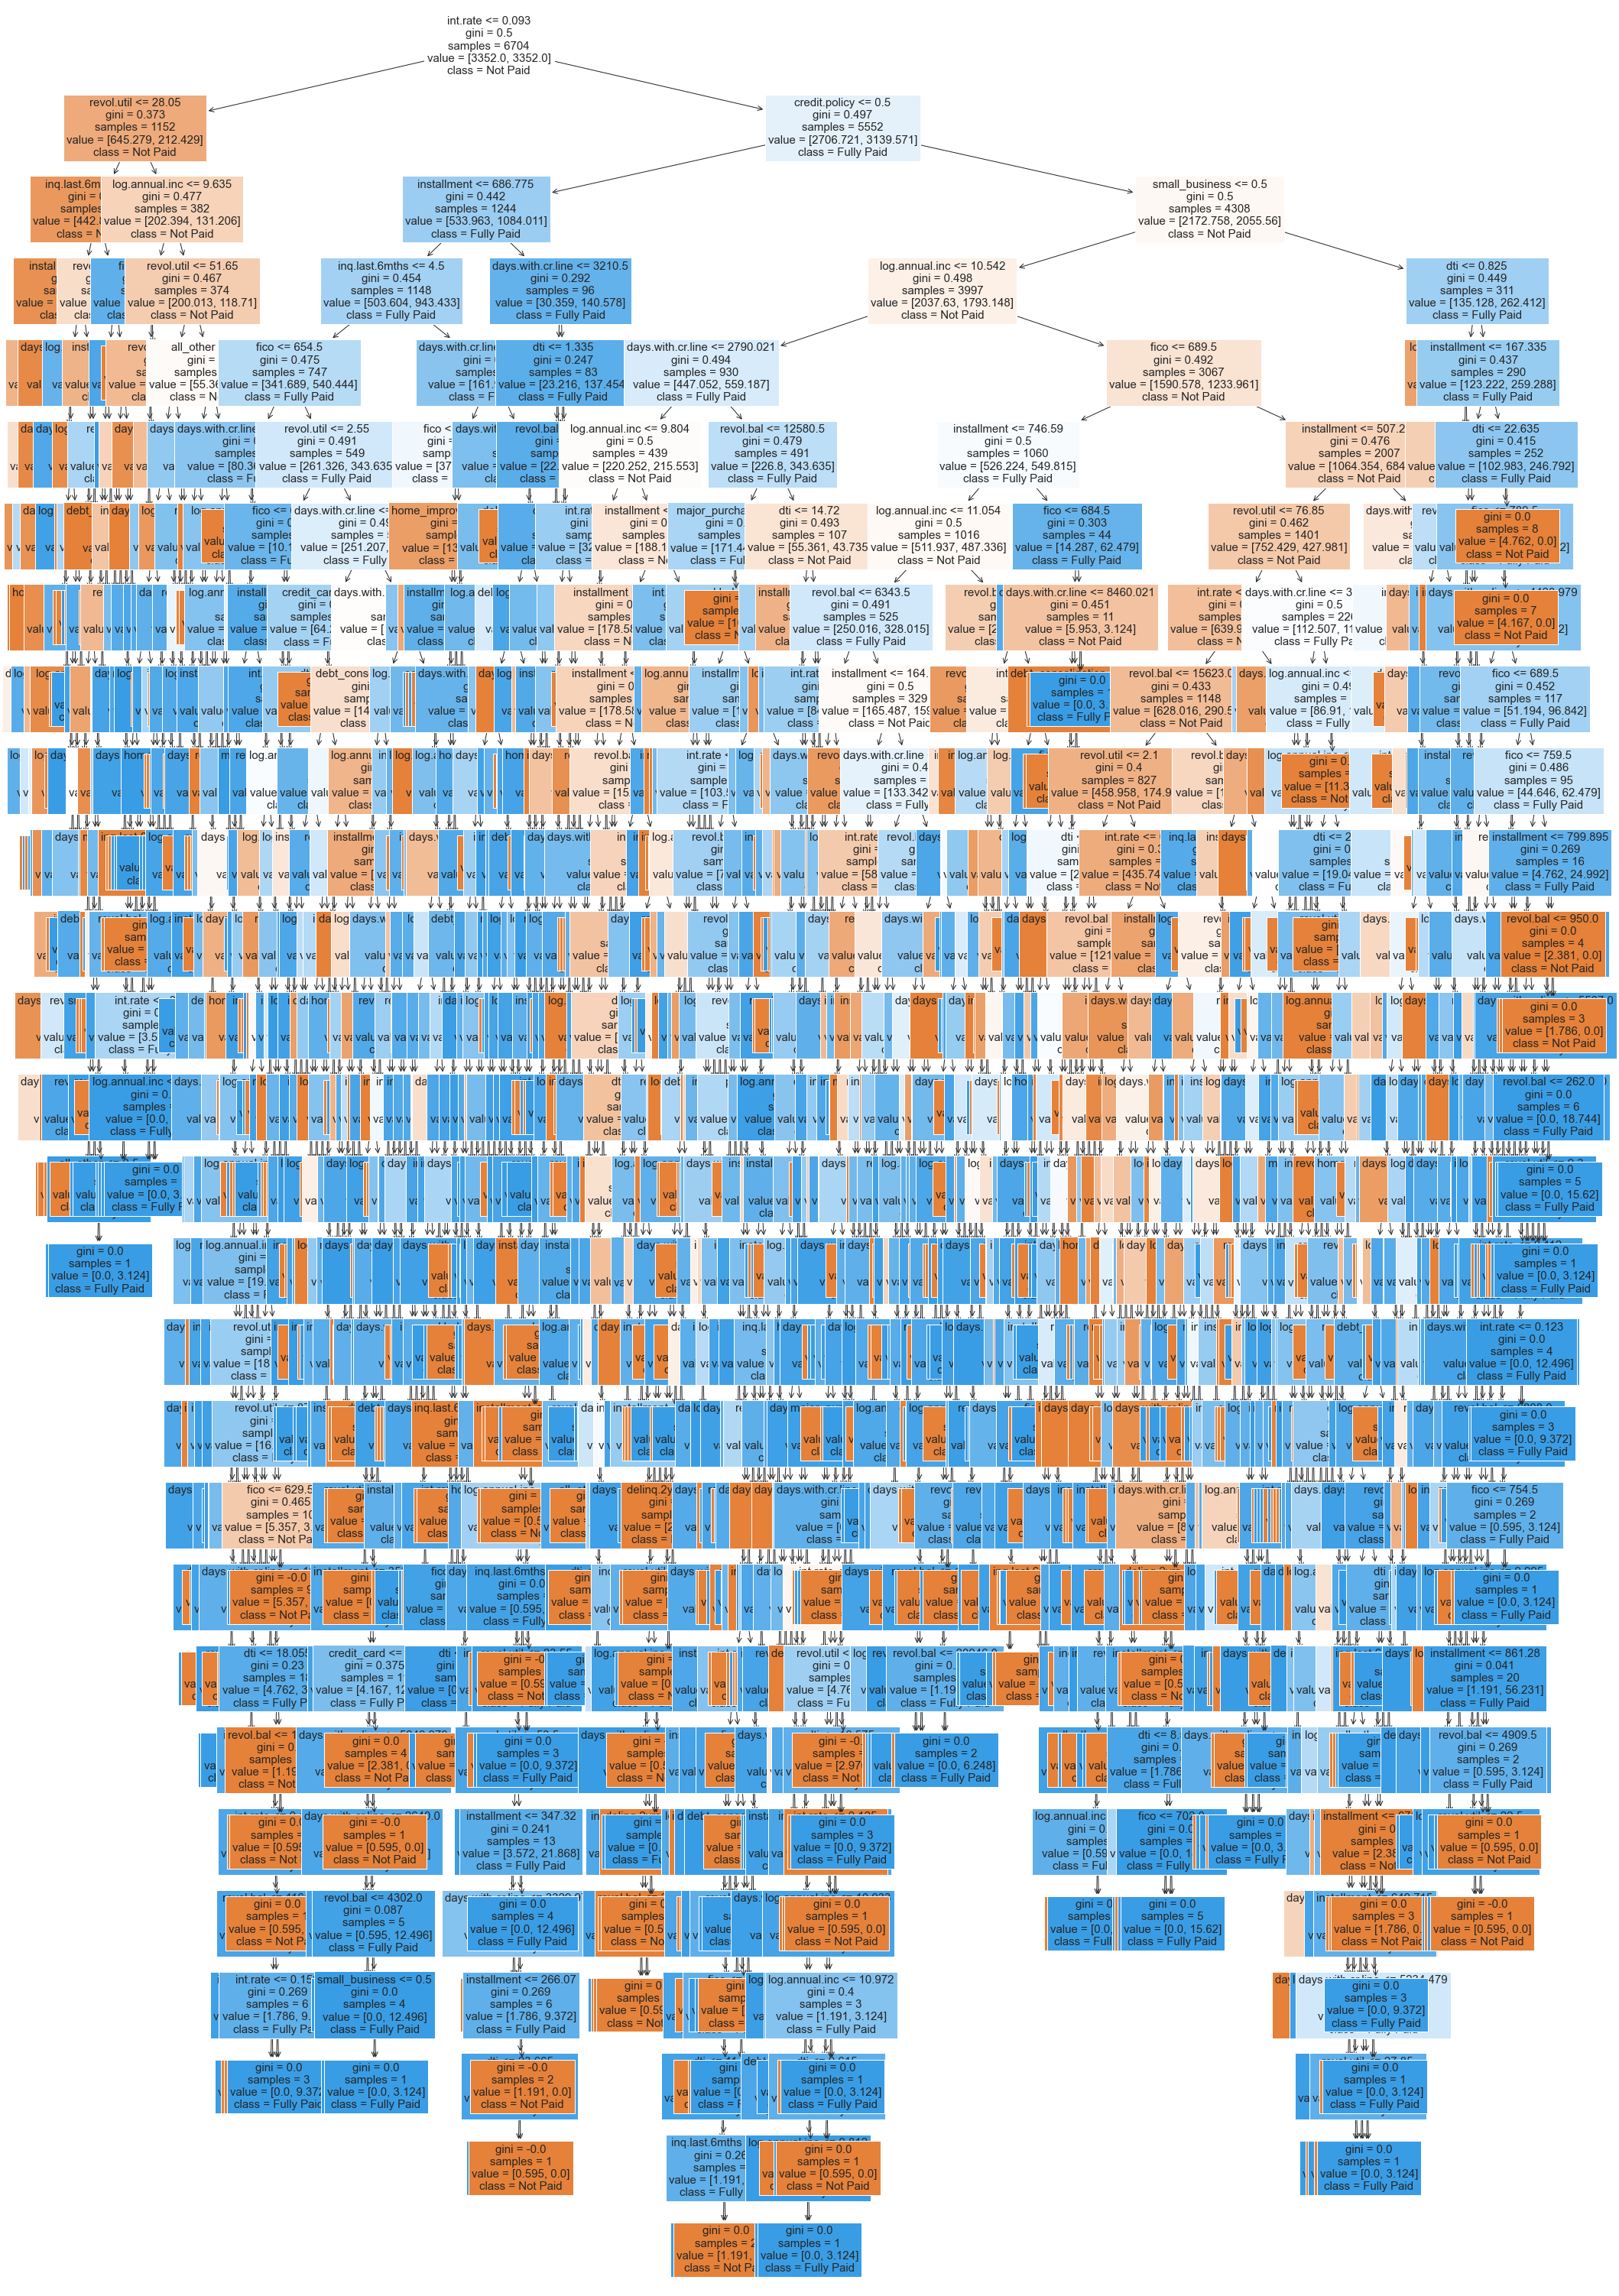

In [24]:
plt.figure(figsize=(35,55))
tree.plot_tree(decision_tree, filled=True, feature_names=X.columns,class_names=['Not Paid','Fully Paid'],fontsize=15)
plt.show()

# 6. Print confusion matrix and classification report before and after pruning the Decision tree. Write down your observations on the effects of pruning

**a. Calculate accuracy measures for full tree**

In [25]:
#Confusion matrix before pruning
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[2009,  405],
       [ 370,   90]], dtype=int64)

In [26]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2009,405,2414
1,370,90,460
All,2379,495,2874


In [27]:
# Generate classification report before pruning
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2414
           1       0.18      0.20      0.19       460

    accuracy                           0.73      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.74      0.73      0.73      2874



# Conclusion Full tree  model 
## Full tree model has got accuracy of 73% on baanced weights 
## Lets build  a modelw with pruning the tree by finding optimal Maximum depth and verify performance 

## Simplify a Decision Tree with an Optimal Maximum Depth

In [28]:
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.metrics import  make_scorer

In [29]:
maxdepth=decision_tree.get_depth()
print("depth of full tree:",maxdepth)

depth of full tree: 27


In [30]:
max_depth_grid_search=GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid({"max_depth":[[maxdepth] for maxdepth in range(1,maxdepth+1)]}),
)

In [31]:
max_depth_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x000001AEF45ED9A0>,
             scoring=make_scorer(accuracy_score))

In [32]:
max_depth_grid_search.best_params_

{'max_depth': 2}

In [33]:
best_max_depth_tree=max_depth_grid_search.best_estimator_

In [34]:
best_max_depth=best_max_depth_tree.get_depth()
best_max_depth

2

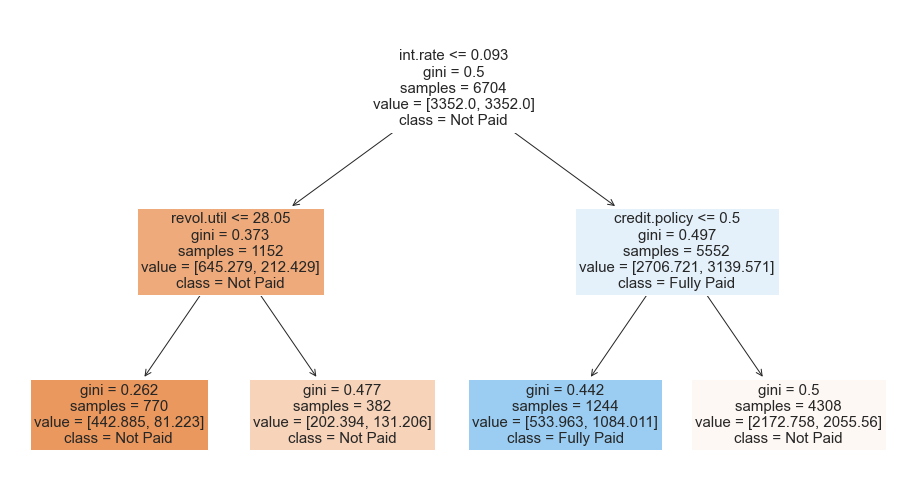

In [35]:
plt.figure(figsize=(16,9))
tree.plot_tree(best_max_depth_tree, filled=True, feature_names=X.columns, class_names=['Not Paid','Fully Paid'],fontsize=15)
plt.show()

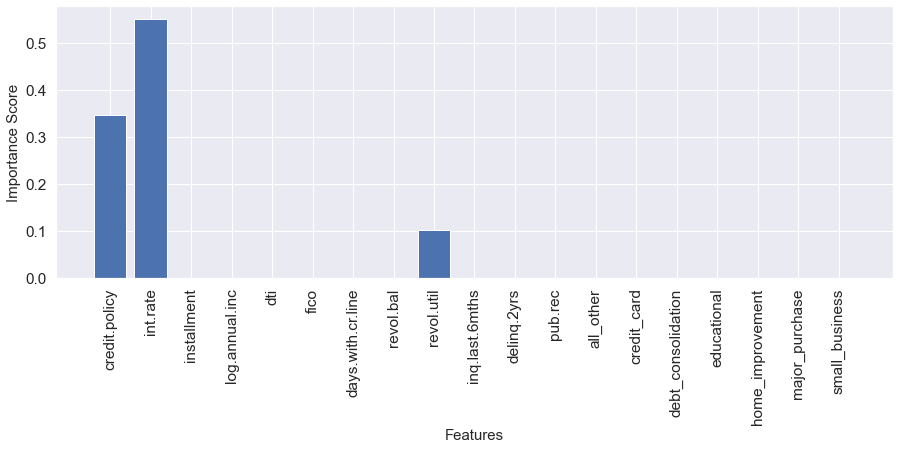

In [36]:
# We can also check the feature importances. 
plt.figure(figsize=(15,5))
features = X.columns.shape[0]
plt.bar(range(features), best_max_depth_tree.feature_importances_)
plt.xticks(np.arange(features), X, rotation=90)
plt.ylabel("Importance Score", size=15)
plt.xlabel("Features", size=15)
plt.show()

## Now generate classification report and confusion matrix after pruning the tree to max depth of 2 

In [37]:
# Generate classification report for best max depth
print (classification_report(y_test,best_max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2414
           1       0.30      0.35      0.33       460

    accuracy                           0.76      2874
   macro avg       0.59      0.60      0.59      2874
weighted avg       0.78      0.76      0.77      2874



In [38]:
#Confusion matrix for best max depth
confusion = confusion_matrix(y_test,best_max_depth_tree.predict(X_test))
confusion

array([[2034,  380],
       [ 297,  163]], dtype=int64)

In [39]:
pd.crosstab(y_test, best_max_depth_tree.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2034,380,2414
1,297,163,460
All,2331,543,2874


## Conclusions from Max depth pruning technique 
## With Optimal max depth simplifiction, we got good accurancy at depth 2
## we can see tree perfomance improve with accurancy from 0.73 to 0.76 at depth of 2
## so we can prune tree at depth 2

## Post Pruning another approach using CCP alphas

In [41]:
ccp_alphas=decision_tree.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
#ccp_alphas

In [42]:
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.metrics import  make_scorer

In [43]:
ccp_alpha_grid_search=GridSearchCV(
    estimator=DecisionTreeClassifier(),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),
)

In [44]:
ccp_alpha_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x000001AEF4613E80>,
             scoring=make_scorer(accuracy_score))

In [45]:
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.0013527872935932793}

In [46]:
best_ccp_alpha_tree=ccp_alpha_grid_search.best_estimator_

In [47]:
bestdepth=best_ccp_alpha_tree.get_depth()
print("depth of full tree:",bestdepth)

depth of full tree: 2


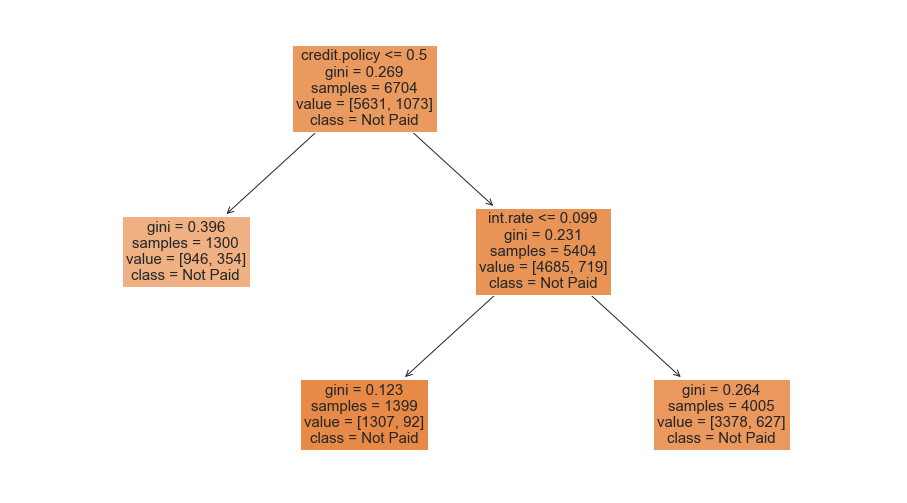

In [48]:
plt.figure(figsize=(16,9))
tree.plot_tree(best_ccp_alpha_tree, filled=True, feature_names=X.columns, class_names=['Not Paid','Fully Paid'],fontsize=15)
plt.show()

## Generate Classification report and confusion matrix with cc alphas pruning technique

In [49]:
# Generate classification report
print (classification_report(y_test,best_ccp_alpha_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.00      0.00      0.00       460

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



In [50]:
#Confusion matrix
confusion = confusion_matrix(y_test,best_ccp_alpha_tree.predict(X_test))
confusion

array([[2414,    0],
       [ 460,    0]], dtype=int64)

In [51]:
pd.crosstab(y_test, best_ccp_alpha_tree.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,2414,2414
1,460,460
All,2874,2874


## With Post pruning we got best results at depth 2 and accuracy is improved  to 85% from initial model with all roots. 
## From confusion matrix it is perfoming at 77% on weighted classed
## Optimal Max depth and CCpahas are gving best results at depth 2 so we can consider both pruning techinques are good for tree pruning 

# Conclusions from pruning
## Balanced weighted tree gave accuracy of 73 % on test data
## Balanced weighted classifer with optimal tree pruning imroved accuracy from 73% 76% on test data
## CC aphas pruning resulted 84% results and 77% on balanced classifier

 # 7. Find out the stratified cross validation accuracy

## Lets findout Stratified CV for all 3 models

In [55]:
# In the case of imbalance data, Stratified K fold cross validation works better
# as the class distribution is preserved across training and test splits.
skf = StratifiedKFold(n_splits=10, shuffle= True, random_state = 100)
cv_results = cross_val_score(decision_tree, X, y, cv=skf, scoring='accuracy')
cv_results
print("Stratified Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

Stratified Cross Validation Accuracy: 0.74 (+/- 0.02)


In [56]:
# In the case of imbalance data, Stratified K fold cross validation works better
# as the class distribution is preserved across training and test splits.
skf = StratifiedKFold(n_splits=10, shuffle= True, random_state = 100)
cv_results_new = cross_val_score(best_ccp_alpha_tree, X, y, cv=skf, scoring='accuracy')
cv_results_new
print("Stratified Cross Validation Accuracy with post pruning the tree wih cc alphas: %0.2f (+/- %0.2f)" % (cv_results_new.mean(), cv_results.std() * 2))

Stratified Cross Validation Accuracy with post pruning the tree wih cc alphas: 0.84 (+/- 0.02)


In [57]:
# In the case of imbalance data, Stratified K fold cross validation works better
# as the class distribution is preserved across training and test splits.
skf = StratifiedKFold(n_splits=10, shuffle= True, random_state = 100)
cv_results_new = cross_val_score(best_max_depth_tree, X, y, cv=skf, scoring='accuracy')
cv_results_new
print("Stratified Cross Validation Accuracy with optimal tree depth: %0.2f (+/- %0.2f)" % (cv_results_new.mean(), cv_results.std() * 2))

Stratified Cross Validation Accuracy with optimal tree depth: 0.76 (+/- 0.02)


# Final Conclusions
## Decsion tress are gave good results with balanced weight
## Optimal max depth and ccalphas improved model with pruning the tree
## Stratified cross validation accuracies are doing good with imbalance data